## Importing Libraries:

In [1]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from pandas import get_dummies, concat, read_csv
from matplotlib.pyplot import hist, show, boxplot, subplots, style, rcParams
from numpy import arange, argmax
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
style.use("seaborn-whitegrid")

## Creating one-hot Function:

In [2]:
def make_one_hot(data, field):
    temp = get_dummies(data[field], prefix=field)
    data.drop(field, axis=1, inplace=True)
    return concat([data, temp], axis=1)

## Reading Dataset:

In [3]:
data = read_csv('train.csv')
data.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)

## Take a Look at a Small Sample of Data:

In [4]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


## Missing Values Identification:

In [5]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Data Describing:

In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Investigation of Age Distribution:

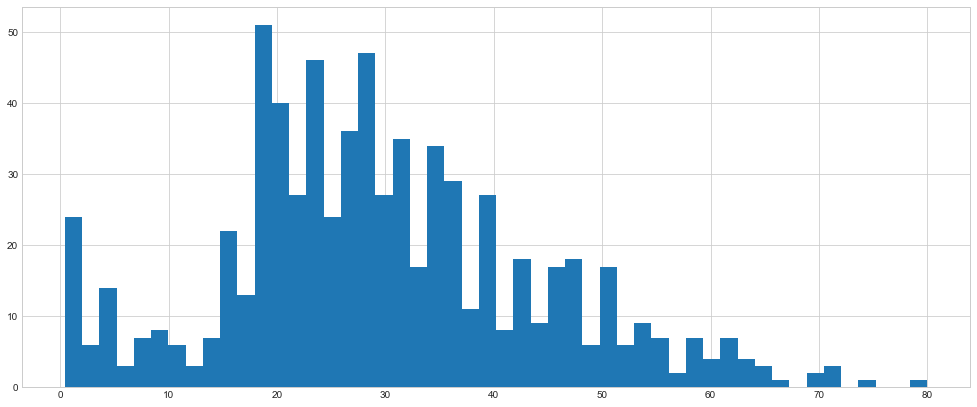

In [7]:
rcParams["figure.figsize"] = (17, 7)
hist(data.Age, bins=50)
show();

## Cutting the Titles:

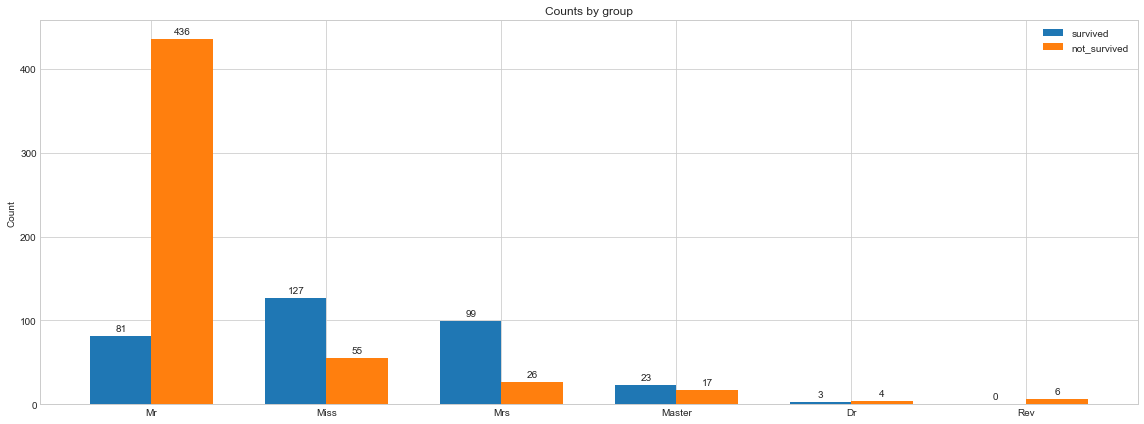

In [8]:
data['Name'] = data['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
val_cnt = data['Name'].value_counts()
labels = []
survived = []
not_survived = []

for k in val_cnt[val_cnt > 2].keys():
    labels.append(k)
    survived.append(data[(data.Survived == 1) & (data['Name'] == k)].shape[0])
    not_survived.append(data[(data.Survived == 0) & (data['Name'] == k)].shape[0])


rcParams["figure.figsize"] = (16, 6)
x = arange(len(labels))
width = 0.35
fig, ax = subplots()
rects1 = ax.bar(x - width / 2, survived, width, label='survived')
rects2 = ax.bar(x + width / 2, not_survived, width, label='not_survived')
ax.set_ylabel('Count')
ax.set_title('Counts by group')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
show()

# we can separate on these, but cannot judge based on 1 row
# ['Mlle','the Countess','Ms','Sir','Lady','Mme',]
# ['Don','Jonkheer','Capt', 'Major']

## Replace Small Titles With other and one hot Name Column:

In [9]:
for x in ['Mlle','Major','Col','the Countess','Capt','Ms','Sir','Lady','Mme','Don','Jonkheer']:
    data['Name'].replace(x, 'others', inplace=True)
    
print(data['Name'].value_counts())
data = make_one_hot(data, 'Name')

Mr        517
Miss      182
Mrs       125
Master     40
others     14
Dr          7
Rev         6
Name: Name, dtype: int64


## Take a Look at The Embarked Column and Check The Survived and Not Survived:

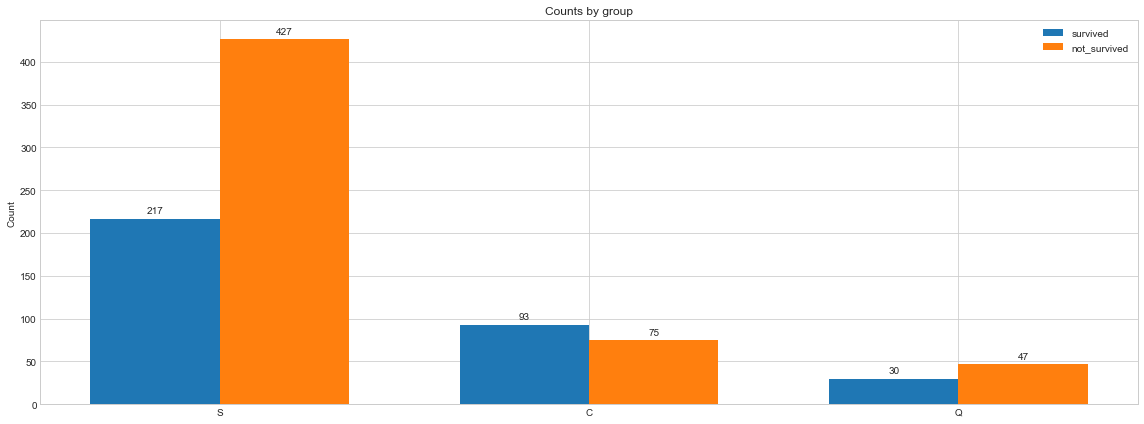

In [10]:
val_cnt = data['Embarked'].value_counts()
labels = []
survived = []
not_survived = []

for k in val_cnt.keys():
    labels.append(k)
    survived.append(data[(data.Survived == 1) & (data['Embarked'] == k)].shape[0])
    not_survived.append(data[(data.Survived == 0) & (data['Embarked'] == k)].shape[0])


x = arange(len(labels))
width = 0.35
fig, ax = subplots()
rects1 = ax.bar(x - width / 2, survived, width, label='survived')
rects2 = ax.bar(x + width / 2, not_survived, width, label='not_survived')
ax.set_ylabel('Count')
ax.set_title('Counts by group')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
show()

## Cutting the Letter in Cabin Column and Check The Survived and Not Survived:

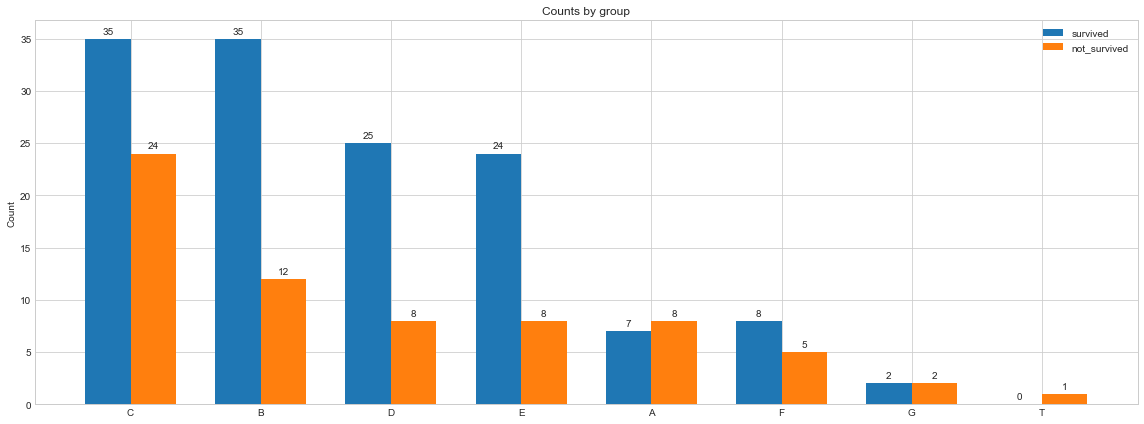

In [11]:
data.Cabin = data[data.Cabin.notnull()]['Cabin'].map(lambda c: c[0])
val_cnt = data['Cabin'].value_counts()
labels = []
survived = []
not_survived = []

for k in val_cnt.keys():
    labels.append(k)
    survived.append(data[(data.Survived == 1) & (data['Cabin'] == k)].shape[0])
    not_survived.append(data[(data.Survived == 0) & (data['Cabin'] == k)].shape[0])


x = arange(len(labels))
width = 0.35
fig, ax = subplots()
rects1 = ax.bar(x - width / 2, survived, width, label='survived')
rects2 = ax.bar(x + width / 2, not_survived, width, label='not_survived')
ax.set_ylabel('Count')
ax.set_title('Counts by group')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
show()

# check only 1 for each cabin

## Dropping The 'T' Cabin:

In [12]:
data.drop(data[data.Cabin == 'T'].index, axis=0, inplace=True)
data.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: Cabin, dtype: int64

## Dropping the Missing Rows Where The Embarked is null:

In [13]:
data.drop(data[data.Embarked.isnull()].index, inplace=True)
data.Embarked.isnull().sum()

0

## one-hot The Embarked Column:

In [14]:
data = make_one_hot(data, 'Embarked')

## Take a Look at Data:

In [15]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Rev,Name_others,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,NaN,0,0,0,1,0,0,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,1,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,0,0,1,0,0,0,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,C,0,0,0,0,1,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,NaN,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,0,0,0,0,0,1,0,0,0,1
887,1,1,female,19.0,0,0,30.0000,B,0,0,1,0,0,0,0,0,0,1
888,0,3,female,NaN,1,2,23.4500,NaN,0,0,1,0,0,0,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,0,0,0,1,0,0,0,1,0,0


## one-hot The Cabin Column and Replacing All Cabins Zeros With null:

In [16]:
from numpy import NaN

data = make_one_hot(data, 'Cabin')


data.loc[(data.Cabin_A == 0) & (data.Cabin_B == 0) & (data.Cabin_C == 0 )& (data.Cabin_D == 0) & (data.Cabin_E == 0) & (data.Cabin_F == 0) & (data.Cabin_G == 0) , 
         ['Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G']] = NaN

## Replacing Sex Nominal Column With 0, 1 and Creating FamilySize Column:

In [17]:
data['Sex'].replace({'male': 0, 'female': 1}, inplace=True)
data['FamilySize'] = data.Parch + data.SibSp
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
data

,Survived,Pclass,Sex,Age,Fare,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,...,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,FamilySize
0,0,3,0,22.0,7.2500,0,0,0,1,0,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,1,1,38.0,71.2833,0,0,0,0,1,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,1,3,1,26.0,7.9250,0,0,1,0,0,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1,1,1,35.0,53.1000,0,0,0,0,1,...,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,0,3,0,35.0,8.0500,0,0,0,1,0,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,0,0,0,0,0,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
887,1,1,1,19.0,30.0000,0,0,1,0,0,...,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
888,0,3,1,NaN,23.4500,0,0,1,0,0,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
889,1,1,0,26.0,30.0000,0,0,0,1,0,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


## Cutting the Label and Dropping it From Data:

In [18]:
labels = data.Survived
data.drop(['Survived'], axis=1, inplace=True)

## Creating x and y train and test:

In [19]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True)

## Scaling Data:

In [20]:
ss = StandardScaler()
ss.fit(x_train)
x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

## Imputing The Missing Values:

In [21]:
ii = KNNImputer()
ii.fit(x_train)
x_train = ii.transform(x_train)
x_test = ii.transform(x_test)

## Replacing Right Value With Cabin Imputed Rows:

In [22]:
x_train[:,-2:-9:-1] = (x_train[:,-2:-9:-1] == x_train[:,-2:-9:-1].max(axis=1)[:,None]).astype(int)
x_test[:,-2:-9:-1] = (x_test[:,-2:-9:-1] == x_test[:,-2:-9:-1].max(axis=1)[:,None]).astype(int)

## Creating MLP Classifier Model:

In [23]:
model = MLPClassifier(hidden_layer_sizes=(), alpha=0.0001, max_iter=300)
model.fit(x_train, y_train)
print(f"MLP Classifier Model Accuracy of Prediction: {model.score(x_test, y_test) * 100}%")

MLP Classifier Model Accuracy of Prediction: 82.58426966292134%


## Evaluation:

In [24]:
scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
print("Accuracy: {} (+/- {})".format(round(scores.mean(), 2), round(scores.std() * 2, 2)))

Accuracy: 0.82 (+/- 0.03)


In [25]:
target_names = ['0', '1']
print(classification_report(y_test, model.predict(x_test), target_names=target_names))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       108
           1       0.79      0.76      0.77        70

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.82       178
weighted avg       0.82      0.83      0.83       178

